<h1>Titanic</h1>
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. It was built by the Harland and Wolff shipyard in Belfast.  <i>~Wikipedia</i>
The iceberg unraveled the ship's hull at a length of 90 meters - the length of the hull plating was 90 m, but on the basis of the examination of the size of damage it was clearly stated that it was a series of cracks, the total area of which was just over 1 square meter (1.18), that is, it was equal to the body surface of an adult human.
<b> This is my first more extensive program.</b> Writing it, I start my adventure with "more serious programming". This is a secound aproach, this time with OOP.

<h4>Chapters:</h4>
<i>

1. Library and data import

2. Analysis, data cleaning and visualization

3. Preparation of data for the model

4. Creating a model

5. Analysis of correctness of the solution and visualization

6. Method analysis

7. Reporting the solution on kaggle
</i>

<b>1. Library and data import</b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Plotting library
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set(style="ticks", color_codes=True)

get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
try:
    train = pd.DataFrame(pd.read_csv('../Titanic-master/train.csv'))
    test = pd.DataFrame(pd.read_csv('../Titanic-master/test.csv'))
    test_w = pd.DataFrame(pd.read_csv('../Titanic-master/test.csv'))
except FileNotFoundError:
    print("Błędna ścieżka")

test.set_index('PassengerId', inplace=True)
train.set_index('PassengerId', inplace=True)

<b>2. Analysis, data cleaning and visualization</b>

<i>
2.1. Sex <br>
2.2. Class<br>
2.3. Embarkment<br>
2.4. Family size<br>
2.5. Fare<br>
</i>

In [3]:
def info_null(column):
    return column.isnull().sum()

def filling_NaN(column):
    null_n = info_null(column)
    
    if null_n > 0 and (null_n <= 50):
        message = f'There are {null_n} fields missing in \'{column.name}\', they are filled with most common value: {column.mode()[0]}'
        column.fillna(column.mode()[0], inplace = True)
    if null_n > 50:
        message = f'There is over 50 empty fields in \'{column.name}\'. A more accurate approximation is recommended.'    
    else:
        message = f'There are no empty fields in \'{column.name}\' column.'
    
    return message

def family_merge(dataset):
    if 'FamilySize' not in dataset.columns:
        dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp']

def info_discrete(column):
    print(filling_NaN(column))
    
    categories = column.unique()
    survived_perc = list()
    labels = list()
    for label in categories:
        labels.append(str(label))
        survived_perc.append([label, train.Survived[column == label].value_counts(normalize=True).sort_index()][1][1])

    plot_discrete = plt.bar(labels, survived_perc)
    plt.ylim([0,1.1])
    plt.grid(axis='y')
    plt.title('Survival rate('+column.name+')')
    return plot_discrete

def info_continous(column, step):
    print(filling_NaN(column))
    
    scope = column.max() - column.min() - step
    survived_perc = list()
    labels = list()
    for i in range(0, int(scope), step):
        survived_perc.append(train.Survived[column.between(i, i+step)].mean())
        labels.append(i)
        
    plot2 = plt.plot(labels, survived_perc, 'bo', ls = '-')
    plt.title('Survival rate('+column.name+')')
    return plot2

def number_cases(column, step):
    scope = column.max() - column.min() - step
    survived_num = list()
    labels = list()
    for i in range(0, int(scope), step):
        survived_num.append(train.Survived[column.between(i, i+5)].count())
        labels.append(i)
        
    plot3 = plt.bar(labels, survived_num, align = 'center')
    plt.title('Number of cases('+column.name+')')
    return plot3

There are no empty fields in 'Sex' column.


<BarContainer object of 2 artists>

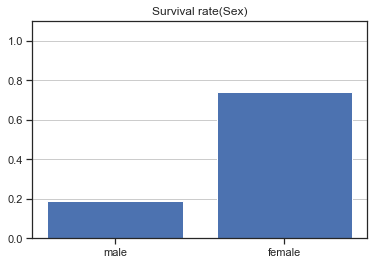

In [4]:
info_discrete(train['Sex'])

There are no empty fields in 'Pclass' column.


<BarContainer object of 3 artists>

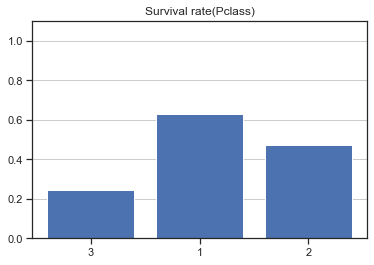

In [5]:
info_discrete(train['Pclass'])

There are no empty fields in 'Embarked' column.


<BarContainer object of 3 artists>

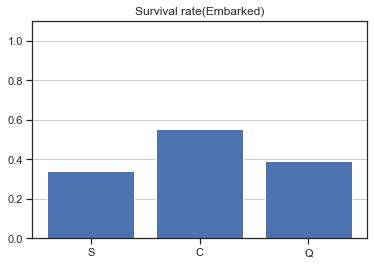

In [6]:
info_discrete(train['Embarked'])

There is over 50 empty fields in 'Age'. A more accurate approximation is recommended.


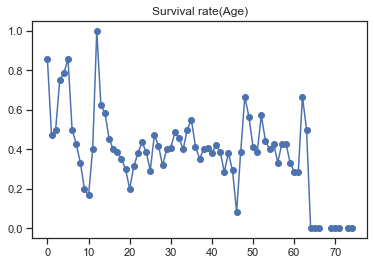

In [7]:
info_continous(train['Age'],1)

<BarContainer object of 78 artists>

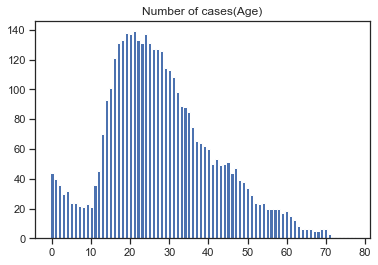

In [8]:
number_cases(train['Age'],1)

There are no empty fields in 'Fare' column.


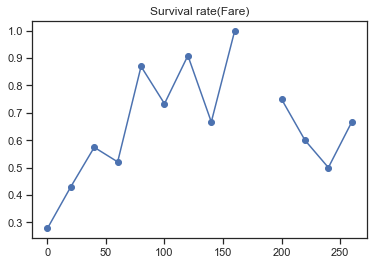

In [9]:
info_continous(train['Fare'],20)

<BarContainer object of 511 artists>

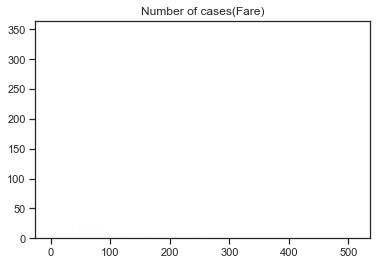

In [10]:
number_cases(train['Fare'],1)

In [11]:
#Due to the small amount of cases and shape of the previous graph showing the percentage of survivors, values above 50 inclusive will be marked as 50.

family_merge(train)
family_merge(test)

There are no empty fields in 'FamilySize' column.


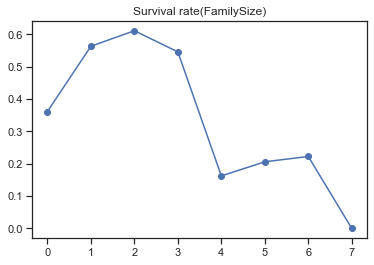

In [12]:
info_continous(train['FamilySize'],1)

<BarContainer object of 9 artists>

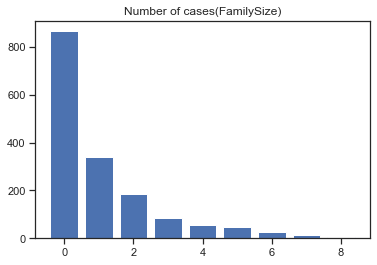

In [13]:
number_cases(train['FamilySize'],1)

<h3>3. Data preparation </h3>

In [14]:
test['Fare'].fillna(int(test['Fare'].median()), inplace = True)


train.drop(['Ticket', 'Cabin', 'Name'], axis = 1,inplace = True)
test.drop(['Ticket', 'Cabin', 'Name'], axis = 1, inplace = True)

test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}).astype(int)
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)

data = train.append(test, sort = True)

for i in range(1,1310):
    if data.loc[i, 'Sex'] == 1 and (data.loc[i, 'Pclass'] == 1):
        if np.isnan(data.loc[i, 'Age']):
            data.loc[i, 'Age'] = 41
    if data.loc[i, 'Sex'] == 0 and (data.loc[i, 'Pclass'] == 1):
        if np.isnan(data.loc[i, 'Age']):
            data.loc[i, 'Age'] = 37
    if data.loc[i, 'Sex'] == 1 and (data.loc[i, 'Pclass'] == 2):
        if np.isnan(data.loc[i, 'Age']):
            data.loc[i, 'Age'] = 31
    if data.loc[i, 'Sex'] == 0 and (data.loc[i, 'Pclass'] == 2):
        if np.isnan(data.loc[i, 'Age']):
            data.loc[i, 'Age'] = 27
    if data.loc[i, 'Sex'] == 1 and (data.loc[i, 'Pclass'] == 3):
        if np.isnan(data.loc[i, 'Age']):
            data.loc[i, 'Age'] = 26
    if data.loc[i, 'Sex'] == 0 and (data.loc[i, 'Pclass'] == 3):
        if np.isnan(data.loc[i, 'Age']):
            data.loc[i, 'Age'] = 22

data.drop(['SibSp', 'Parch'],axis=1,inplace=True)

data['Embarked'] = data['Embarked'].map({'S':1, 'C':2, 'Q':3}).astype(int)

In [15]:
data.loc[data['Fare'] > 100, 'Fare'] = 100
data['Fare'] = data['Fare'].astype(int)

<BarContainer object of 99 artists>

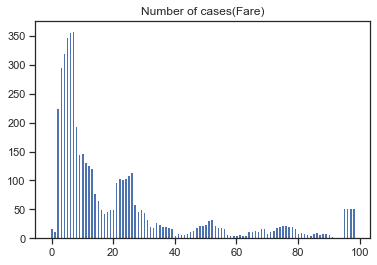

In [16]:
number_cases(data['Fare'],1)

In [17]:
training = data.iloc[:891,:]
testing = data.iloc[891:,:]
trainY = training['Survived']
trainX = training.drop(['Survived'], axis = 1)
testX = testing.drop(['Survived'], axis = 1)

<h3> 4. Model </h3>

The optimal number of neighbors is 5


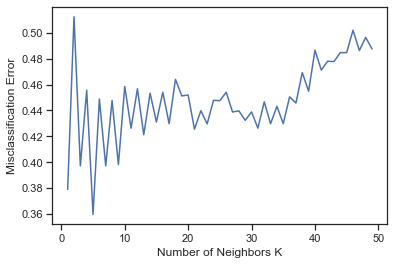

In [18]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(range(1,50))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, trainX, trainY, cv=10, scoring='f1')
    cv_scores.append(scores.mean())
    
from sklearn.metrics import accuracy_score
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
def model_choice(trainX, trainY, testX):
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC, LinearSVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.linear_model import Perceptron
    from sklearn.linear_model import SGDClassifier
    from sklearn.tree import DecisionTreeClassifier
    
    reglog = LogisticRegression()
    reglog.fit(trainX, trainY)
    Y_predLR = reglog.predict(testX)
    acc_log = round(reglog.score(trainX, trainY) * 100, 2)
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(trainX, trainY)
    Y_predKNN = knn.predict(testX)
    acc_knn = round(knn.score(trainX, trainY) * 100, 2)

    gaussian = GaussianNB()
    gaussian.fit(trainX, trainY)
    Y_predG = gaussian.predict(testX)
    acc_gaussian = round(gaussian.score(trainX, trainY) * 100, 2)

    perceptron = Perceptron()
    perceptron.fit(trainX, trainY)
    Y_predP = perceptron.predict(testX)
    acc_perceptron = round(perceptron.score(trainX, trainY) * 100, 2)

    svc = SVC()
    svc.fit(trainX, trainY)
    Y_pred = svc.predict(testX)
    acc_svc = round(svc.score(trainX, trainY) * 100, 2)

    linear_svc = LinearSVC()
    linear_svc.fit(trainX, trainY)
    Y_predLSVC = linear_svc.predict(testX)
    acc_linear_svc = round(linear_svc.score(trainX, trainY) * 100, 2)

    sgd = SGDClassifier()
    sgd.fit(trainX, trainY)
    Y_predSGD = sgd.predict(testX)
    acc_sgd = round(sgd.score(trainX, trainY) * 100, 2)

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(trainX, trainY)
    Y_predD = decision_tree.predict(testX)
    acc_decision_tree = round(decision_tree.score(trainX, trainY) * 100, 2)

    random_forest = RandomForestClassifier(n_estimators=400, max_features = 'sqrt', oob_score = True, n_jobs = -1)
    random_forest.fit(trainX, trainY)
    Y_predRF = random_forest.predict(testX)
    random_forest.score(trainX, trainY)
    acc_random_forest = round(random_forest.score(trainX, trainY) * 100, 2)

    print('LogisticRegression =', acc_log)
    print('KNeighborsClassifier =', acc_knn)
    print('GaussianNB =', acc_gaussian)
    print('Perceptron =', acc_perceptron)
    print('LinearSVC =', acc_linear_svc)
    print('SVC =', acc_svc)
    print('SGDClassifier =', acc_sgd)
    print('DecisionTreeClassifier =', acc_decision_tree)
    print('RandomForestClassifier =', acc_random_forest)

In [ ]:
model_choice(trainX, trainY, testX)

In [21]:
from sklearn.ensemble import RandomForestClassifier
acc = []
for i in range(50,75):
    random_forest = RandomForestClassifier(n_estimators=i, max_features = 'sqrt', oob_score = True, n_jobs = -1)
    random_forest.fit(trainX, trainY)
    Y_predRF = random_forest.predict(testX).astype('int64', copy = False)
    random_forest.score(trainX, trainY)
    acc.append(round(random_forest.score(trainX, trainY) * 100, 2))

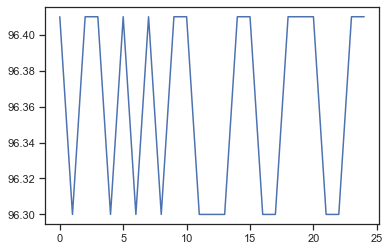

In [22]:
plt.plot(acc)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_w["PassengerId"],
        "Survived": Y_predRF
    })

submission.to_csv('../submission.csv', index=False)